In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [92]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [93]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [95]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# Scaling

In [96]:
#Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286


In [97]:
#max-min normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
df_normalized.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0


# Overfiting

In [98]:
x=df[['area']]
y=df['price']

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [100]:
poly = PolynomialFeatures(degree=3) 
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

model=LinearRegression()
model.fit(x_train_poly,y_train)


LinearRegression()

In [101]:
y_train_predicted = model.predict(x_train_poly)
y_test_predicted = model.predict(x_test_poly)

In [102]:
train_r2 = r2_score(y_train, y_train_predicted)
test_r2 = r2_score(y_test, y_test_predicted)
print('Train R2 Score:', train_r2)
print('Test R2 Score:', test_r2)


Train R2 Score: 0.33080192639287787
Test R2 Score: 0.29493644006790243


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


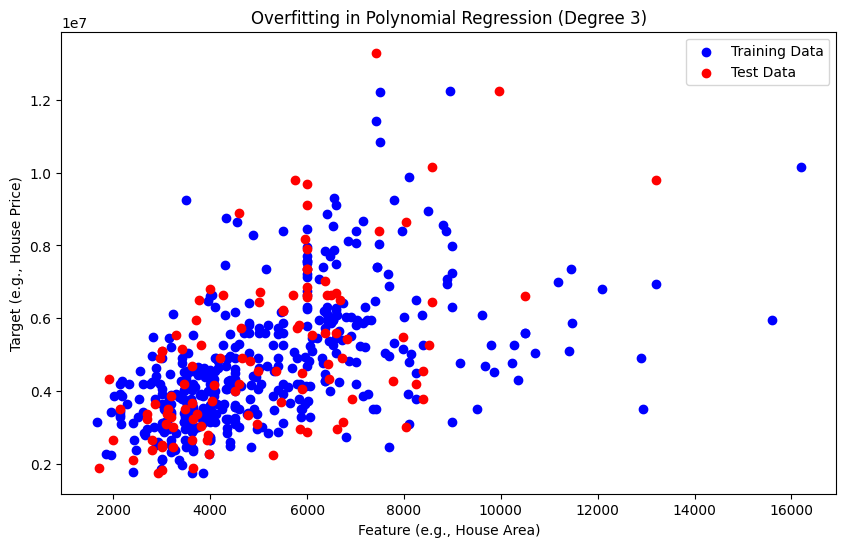

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')

x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
x_plot_poly = poly.transform(x_plot)
y_plot = model.predict(x_plot_poly)

plt.xlabel("Feature (e.g., House Area)")
plt.ylabel("Target (e.g., House Price)")
plt.title("Overfitting in Polynomial Regression (Degree 3)")
plt.legend()
plt.show()

In [104]:
from sklearn.linear_model import Ridge , Lasso

ridge = Ridge(alpha=0.1)
ridge.fit(x_train_poly, y_train)

y_train_predicted = ridge.predict(x_train_poly)
y_test_predicted = ridge.predict(x_test_poly)

train_r2 = r2_score(y_train, y_train_predicted)
test_r2 = r2_score(y_test, y_test_predicted)
print('Train R2 Score:', train_r2)
print('Test R2 Score:', test_r2)

Train R2 Score: 0.33080192639288486
Test R2 Score: 0.29493642512766305


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.44182e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [105]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_poly, y_train)

y_train_predicted = lasso.predict(x_train_poly)
y_test_predicted = lasso.predict(x_test_poly)

train_r2 = r2_score(y_train, y_train_predicted)
test_r2 = r2_score(y_test, y_test_predicted)
print('Train R2 Score:', train_r2)
print('Test R2 Score:', test_r2)

Train R2 Score: 0.33077708284638174
Test R2 Score: 0.29503785880725


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.498e+14, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(


# Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [107]:
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [108]:
predictions = model.predict(x)

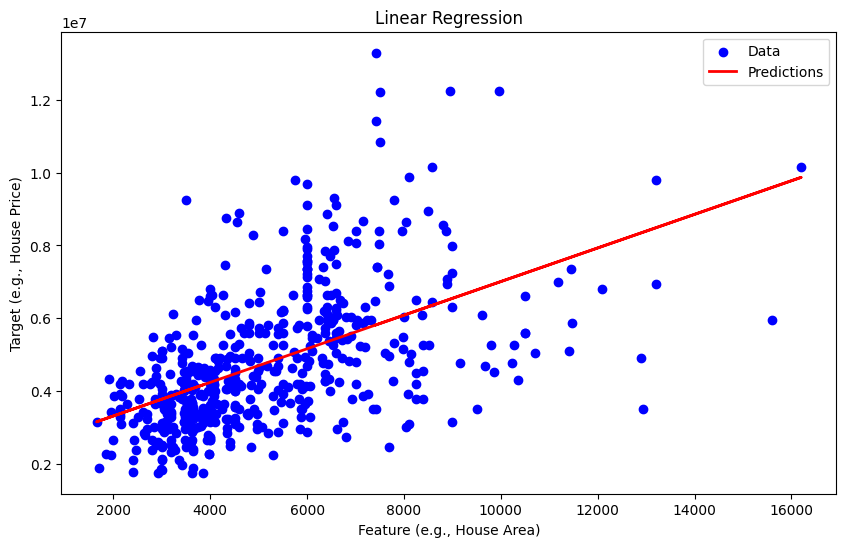

In [111]:
plt.figure(figsize=(10, 6)) 
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, predictions, color='red', label='Predictions', linewidth=2)
plt.xlabel('Feature (e.g., House Area)')
plt.ylabel('Target (e.g., House Price)')
plt.title('Linear Regression')
plt.legend()


# Multiple Linear Regression

In [112]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
Y = df['price']

In [113]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [114]:
predictions = model.predict(X)

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

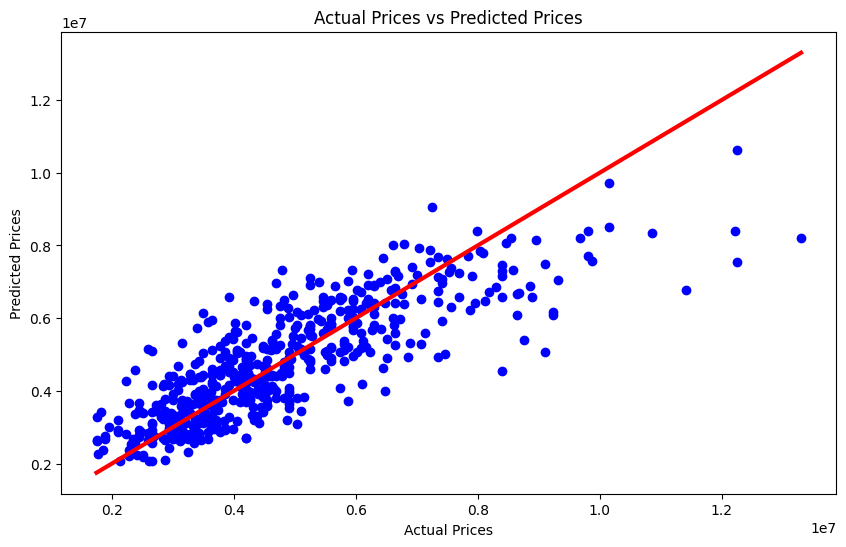

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(Y, predictions, color='blue')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')


#  Polynomial Regression

In [119]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [120]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [121]:
predictions = model.predict(x_poly)


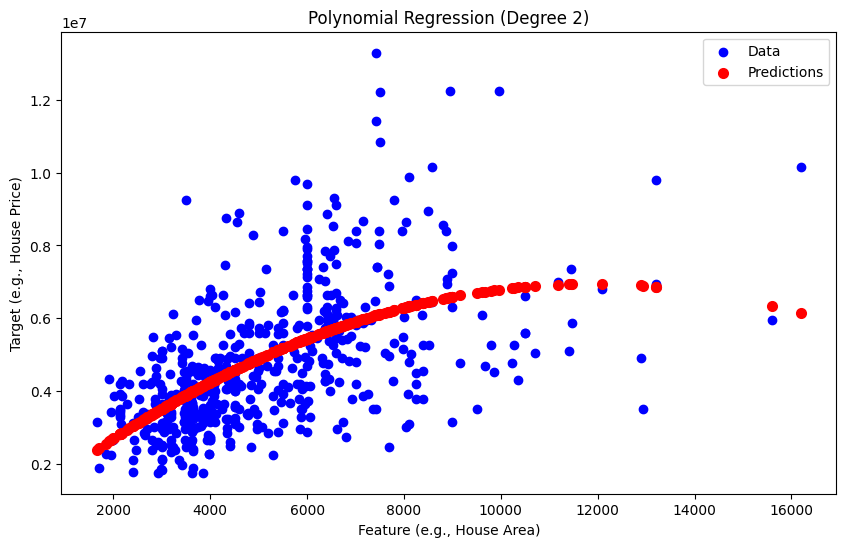

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.scatter(x, predictions, color='red', label='Predictions', linewidth=2)
plt.xlabel('Feature (e.g., House Area)')
plt.ylabel('Target (e.g., House Price)')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()